In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def compute_mse(y, tx, w):
    """Calculate the loss using MSE"""
    error = y - tx.dot(w.T)
    return (1/(2 * (tx.shape[0]))) * error.dot(error)

In [3]:
def compute_rmse(y, tx, w):
    return np.sqrt(2 * compute_mse(y, tx, w))

In [4]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.linalg.inv(tx.T @ tx) @ tx.T @ y
    return w


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [5]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w, err_least_square = least_squares(y, tx)
    print(w, err_least_square)

Test it here

In [6]:
test_your_least_squares()

73.29392200210519 13.479712434989047


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [7]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [8]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    return np.power(x[:, np.newaxis], np.arange(degree + 1))

In [9]:
c = y.copy()
d = build_poly(x.copy(), 12)
w1 = np.linalg.inv(d.T @ d).dot(d.T @ c)
a = d.T.dot(d)
b = d.T.dot(c)
w2 = np.linalg.solve(a, b)
print(w2)
print(w1)

[ 5.70919237e-01 -3.60418912e+00  1.37812948e+01 -2.05142261e+01
  1.37151669e+01 -1.12621482e+00 -4.54649401e+00  3.38836450e+00
 -1.22299305e+00  2.58271292e-01 -3.24533368e-02  2.25274182e-03
 -6.66330386e-05]
[ 4.20858969e-01 -4.19214582e+00  1.41005213e+01 -2.05748698e+01
  1.37181815e+01 -1.12512982e+00 -4.54673526e+00  3.38838442e+00
 -1.22299428e+00  2.58271509e-01 -3.24533676e-02  2.25274366e-03
 -6.66330856e-05]


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [10]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

In [11]:
from plots import *

def polynomial_regression(x,y):
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        x_poly = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        weights = least_squares(y, x_poly)
        rmse = compute_rmse(y, x_poly, weights)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.4718760796342188
Processing 2th experiment, degree=3, rmse=0.258582776677375
Processing 3th experiment, degree=7, rmse=0.24965870360907347
Processing 4th experiment, degree=12, rmse=0.24337224835787005


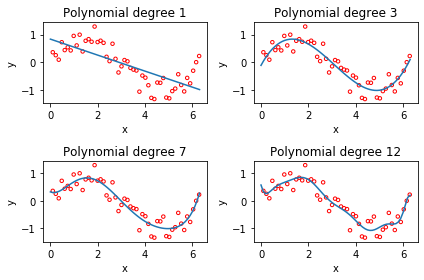

In [12]:
polynomial_regression(x, y)

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [74]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    ind = np.random.permutation(y.shape[0])
    threshold = int(y.shape[0]*ratio)
    return y[ind[:threshold]], x[ind[:threshold]], y[ind[threshold:]], x[ind[threshold:]] 

Then, test your `split_data` function below.

In [14]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_tr, x_tr, y_ts, x_ts = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_tr_poly = build_poly(x_tr, degree)
    x_ts_poly = build_poly(x_ts, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    w_tr = least_squares(y_tr, x_tr_poly)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = compute_rmse(y_tr, x_tr_poly, w_tr)
    rmse_te = compute_rmse(y_ts, x_ts_poly, w_tr)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [15]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [16]:
seed = 6
degrees = [1, 3, 7, 12, 25, 45, 150]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.509
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.735
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.734
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.699
proportion=0.9, degree=25, Training RMSE=0.240, Testing RMSE=0.720
proportion=0.9, degree=45, Training RMSE=0.229, Testing RMSE=0.808
proportion=0.9, degree=150, Training RMSE=0.212, Testing RMSE=0.862
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.916
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=1.046
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=1.051
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.023
proportion=0.5, degree=25, Training RMSE=0.188, Testing RMSE=3.953
proportion=0.5, degree=45, Training RMSE=0.122, Testing RMSE=35.717
proportion=0.5, degree=150, Training RMSE=0.160, Testing RMSE=31943.511
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0

# 3 Ridge Regression
Please fill in the function below.

In [17]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [57]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    #l = np.diag([lambda_]*tx.shape[1])
    l = 2 * y.shape[0] * lambda_ *  np.identity(tx.shape[1])
    a = tx.T @ tx + l
    b = tx.T @ y
    return np.linalg.solve(a, b)

In [91]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    lambdas = np.concatenate((lambdas, [2, 3]))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_tr, x_tr, y_te, x_te = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_tr_poly = build_poly(x_tr, degree)
    x_te_poly = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w = ridge_regression(y_tr, x_tr_poly, lambda_)
        rmse_tr.append(compute_rmse(y_tr, x_tr_poly, w))
        rmse_te.append(compute_rmse(y_te, x_te_poly, w))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

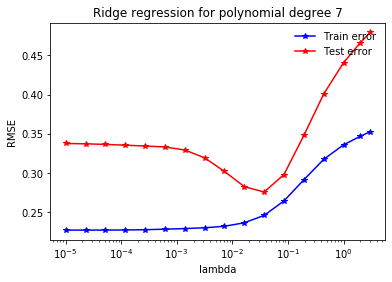

In [92]:
seed = 56
degree = 7 
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)